# Get meteo data #

In [1]:
import sys
import os
pwd = os.getcwd()
two_levels_down = os.path.abspath(os.path.join(pwd, '..','..',))
sys.path.append(two_levels_down)
from src.physiographic.base import Basin
from src.meteo.meteo_netcdf import StationNetCDF
import matplotlib.pyplot as plt

In [2]:
project_folder = "path/to/your/project/"
files_list = ["DEM_grass.tif", # DEM tif file
                "FAC_grass.tif", #Flow accumulation tif file
                "LC_grass.tif", # Land conver tif file
                "Watershed_grass.tif", # Watershed tif file
                "CAT_grass.tif" #Sub basins tif file
                ]
# 2- Create
bassinVersant_file = os.path.join(project_folder,
                                    "results",
                                    "bassinVersant.json")
# 4- Create basin Object:
basin = Basin(project_folder,
                "Melezes",
                files_list,
                bassinVersant_file)
# 5- Create the Meteo data object
MeteoStations = StationNetCDF.charge_ERA_Meteo(basin,
                                                os.path.join(project_folder,"meteo","ERA"))
# 6- Do the interpolation
dsi = MeteoStations.interpolation("nearest")
# 7- Construct the meteo structure for CEQUEAU
grid_CEQUEAU = MeteoStations.cequeau_grid(dsi,basin)
# 8- Save the netcdf with the meteo data
grid_CEQUEAU.to_netcdf(os.path.join(project_folder,"meteo","meteo_cequeau.nc"))

c:\Users\Owner\anaconda3\envs\pycequeau\lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [3]:
dsi

<xarray.Dataset>
Dimensions:      (time: 15341, j: 41, i: 33)
Coordinates:
  * time         (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2020-12-31
  * j            (j) int16 50 49 48 47 46 45 44 43 ... 17 16 15 14 13 12 11 10
  * i            (i) int16 10 11 12 13 14 15 16 17 ... 35 36 37 38 39 40 41 42
Data variables:
    rayonnement  (time, j, i) float64 nan nan nan nan nan ... nan nan nan nan
    nebulosite   (time, j, i) float32 nan nan nan nan nan ... nan nan nan nan
    tMax         (time, j, i) float32 nan nan nan nan nan ... nan nan nan nan
    tMin         (time, j, i) float32 nan nan nan nan nan ... nan nan nan nan
    pTot         (time, j, i) float32 nan nan nan nan nan ... nan nan nan nan
    pression     (time, j, i) float32 nan nan nan nan nan ... nan nan nan nan
    vitesseVent  (time, j, i) float32 nan nan nan nan nan ... nan nan nan nan
    CE           (j, i) float16 nan nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    interpolated:  Interpolated using the method: nearest from xr.Dataset.int...

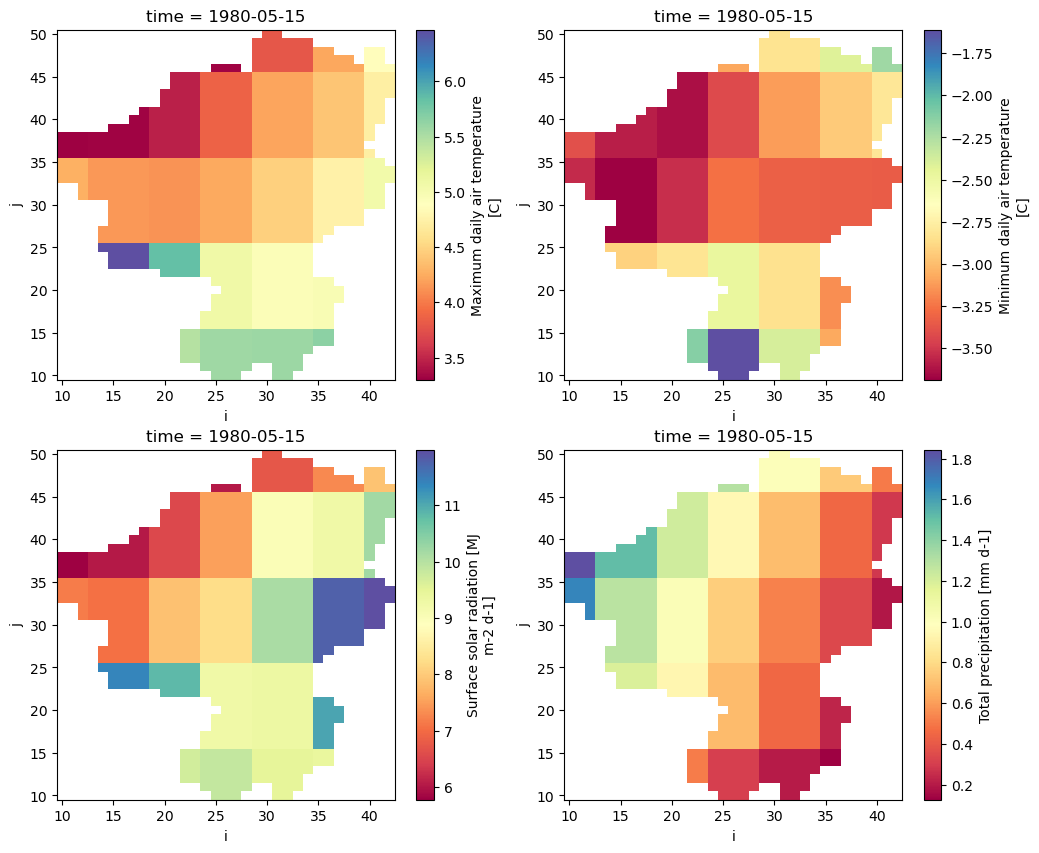

In [4]:
dsi = dsi.isel(time=500)
fig, axes = plt.subplots(ncols=2,
                        nrows=2,
                        figsize=(12, 10))
dsi["tMax"].plot(ax=axes[0,0], cmap='Spectral')
# axes[0].set_title("Raw data")
dsi["tMin"].plot(ax=axes[0,1], cmap='Spectral')
dsi["rayonnement"].plot(ax=axes[1,0], cmap='Spectral')
# axes[0].set_title("Raw data")
dsi["pTot"].plot(ax=axes[1,1], cmap='Spectral')